<a href="https://colab.research.google.com/github/beliaazzhr/ProjectBased-Regresi-Bagging/blob/main/Project_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Based Cinggroup**
* Anyelir Belia Azzahra	- 1301200048
* Fakhri Maulana Falah	- 1301202117
* Gilang Satya Nugraha	- 1301202319
* Mirai Tsuchiya		- 1301203555

##**Ikhtisar Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

In [ ]:
#menampilkan data autos-mpg
df=pd.read_csv("autos_mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Menampilkan Tipe Data pada dataset autos-mpg

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

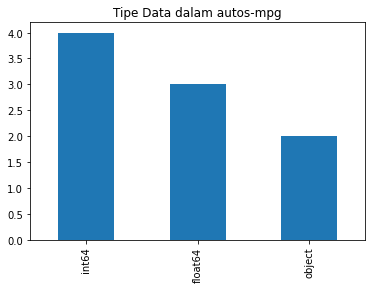

In [ ]:
#menampilkan tipe data
dt = df.dtypes.value_counts()
dt = dt.plot.bar()
dt.set_title("Tipe Data dalam autos-mpg")
dt.plot()
df.dtypes

##**Eksplorasi dan Preprocessing Data**

###**Mengisi data null dengan Imputer**

In [ ]:
# Mengubah data yang berisi '?' menjadi null
df = df.replace('?',np.NaN)

In [ ]:
# Menampilkan kolom pada dataset autos-mpg
print("Kolom :", df.columns, "\n")

# Menampilkan data yang duplikat pada autos-mpg
print("Duplikat :", df.duplicated().sum(), "\n")

# Menampilkan data yang kosong pada autos-mpg
print(df.isnull().sum())

Kolom : Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object') 

Duplikat : 0 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [ ]:
#menambahkan data null
null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    null.append(i)

In [ ]:
# Mengisi data kosong dengan median
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan) #menggunakan imputer untuk mengubah menjadi median
imputer.fit(df[null])
df[null] = imputer.transform(df[null])

####**Hasil Pengisian data yang kosong**

In [ ]:
# Menampilkan data yang kosong setelah diisi
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


###**Menampilkan korelasi**

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

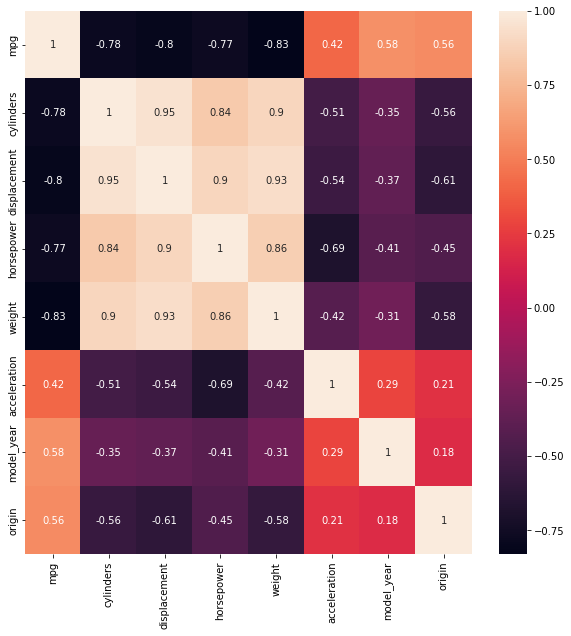

mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [ ]:
# print korelasi / heatmap
print(df.corr())
#deklarasi size plot
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(df.corr(), annot=True)
plt.show()

corr_mat=df.corr()
#menampilkan plot berdasarkan target mpg
print(corr_mat["mpg"].sort_values(ascending=False)) 

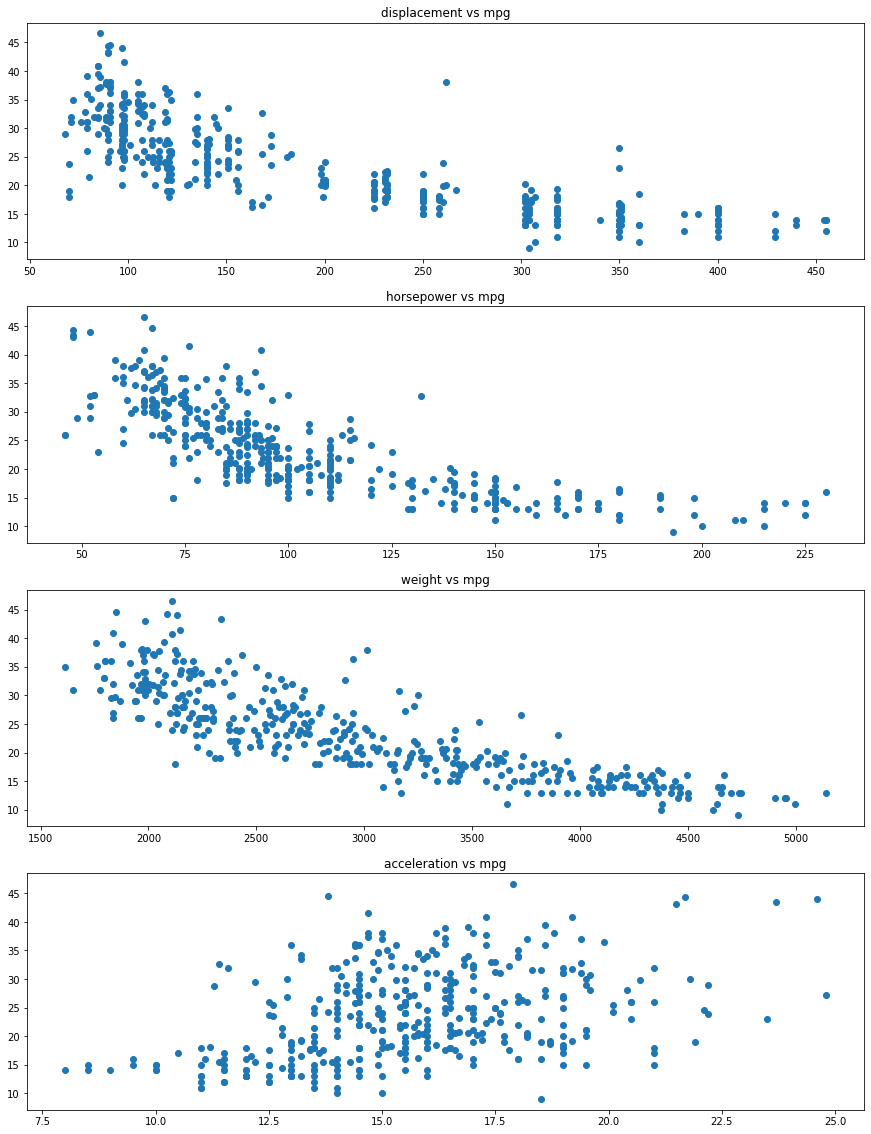

In [ ]:
# menampilkan scatter plot dari keempat kolom yang dipilih dibandingkan
# dengan mpgnya
fig, ax = plt.subplots(4, 1,figsize=(15,20))
#menggunakan 4 data yang dipilih, yaitu data dengan korelasi terbesar. 
cont = ['displacement', 'horsepower', 'weight', 'acceleration']
for i,x in enumerate(cont):
    ax[i].scatter(df[x],df['mpg'],label=("{} vs mpg".format(x)))
    ax[i].set_title("{} vs mpg".format(x))
plt.show() 

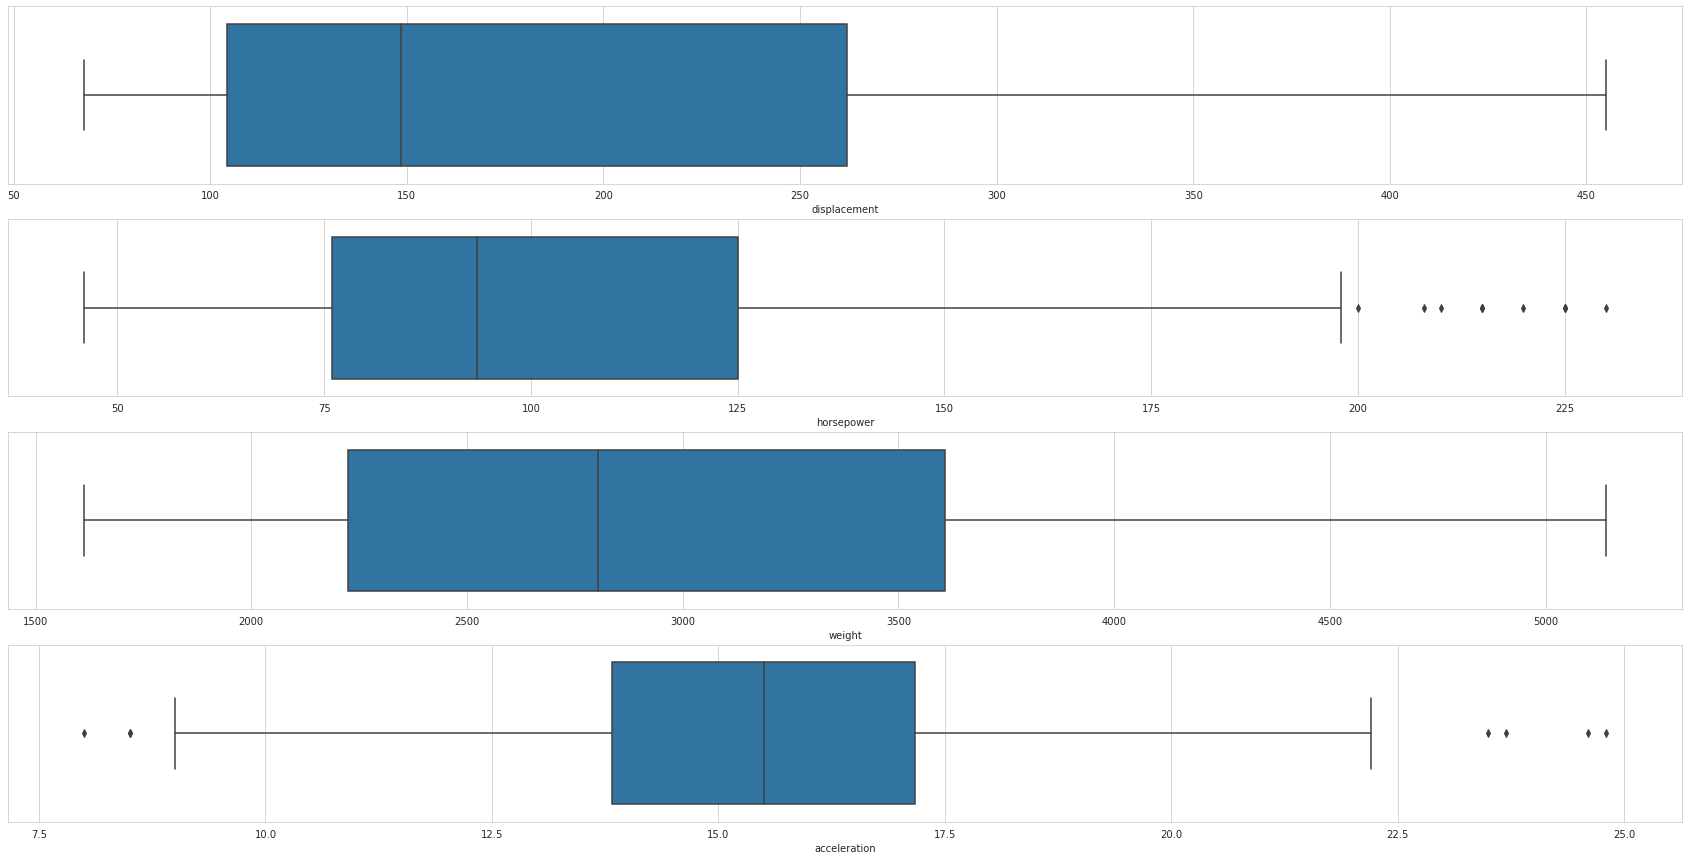

In [ ]:
# print boxplot dari data diatas
sns.set_style("whitegrid")
#mendeklarasikan boxplot untuk menampilkan outliers
fig, axes = plt.subplots(4, 1, figsize=(30, 15))
for i,x in enumerate(cont):
    sns.boxplot(ax=axes[i], x=x, data=df)
plt.show()

###**Menghilangkan Outliers**

In [ ]:
# Fungsi menghapus outliers agar tidak ada pencilan yang terlampau jauh
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    #mendeklarasika Interquartile range dengan Quartil3 dikurangi Quartil1
    IQR=Q3-Q1
    #mendeklarasikan lower range dan upper range
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    #mengembalikan nilai lower_range dan upper_range dari proses di atas
    return lower_range, upper_range

In [ ]:
# Menjalankan penghapusan outliers
for column in df[cont].columns:
    print(column)
    #memanggil fungsi remove_outliers
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

displacement
horsepower
weight
acceleration


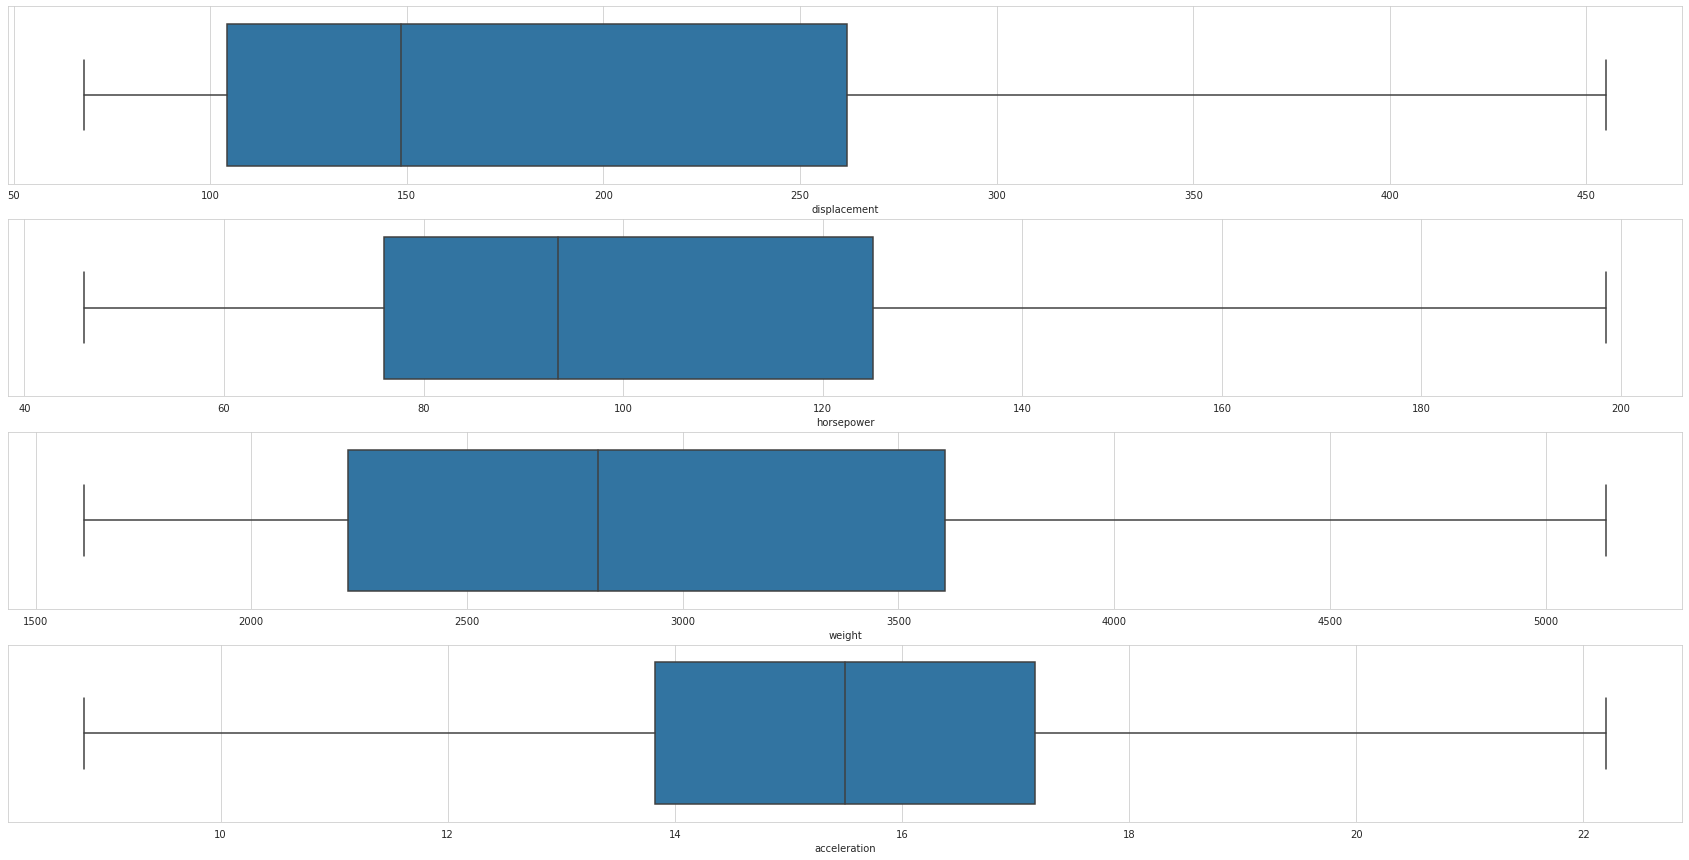

In [ ]:
# print boxplot dari data tanpa outliers -> code yang sama dari sebelumnya dengan keadaan setelah penghilangan outliers. 
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(30, 15))
for i,x in enumerate(cont):
    sns.boxplot(ax=axes[i], x=x, data=df)
plt.show()

###**Splitting data test dan train**

In [ ]:
#Proses Splitting data test dan train

#mengedrop data yang tidak dibutuhkan dan dimasukkan pada variabel X, dan data target yaitu mpg pada variabel Y 
X = df.drop(['mpg','car_name',"origin","acceleration","horsepower"],axis='columns')
Y =df['mpg']
#dilakukan split data menggunakan test size sebesar 20%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)
#menampilkan hasil dari jumlah data train dan data tes
print("jumlah data train :",len(X_train))
print("jumlah data tes :",len(X_test)) 

jumlah data train : 318
jumlah data tes : 80


###**Scaling**

In [ ]:
#Scaling
#menggunakan StandardScaler untuk menghilangkan variansi data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

##**Pemodelan Data**

In [ ]:
#membuat model bagging regresor
br = BaggingRegressor()
#Memfit model ke data
br.fit(X_train_scaled,Y_train)
#Melakukan prediksi pada data test
Y_pred = br.predict(X_test_scaled)

##**Evaluasi**

In [ ]:
#Menampilkan R2 Score train, score test, dan score test yang menggunakan metrik sklearn, serta MSE dan RMSE
print("skor train R2 :",br.score(X_train_scaled,Y_train))
print("skor Test R2 :",br.score(X_test_scaled,Y_test))
print("skor Test R2 (sklearn metrics) :",r2_score(Y_test,Y_pred))
print("MSE :",mean_squared_error(Y_test,Y_pred))
print("RMSE :",mean_squared_error(Y_test,Y_pred,squared=False))

skor train R2 : 0.9725944137247196
skor Test R2 : 0.7839769861233264
skor Test R2 (sklearn metrics) : 0.7839769861233264
MSE : 12.55076125
RMSE : 3.5427053574916445


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


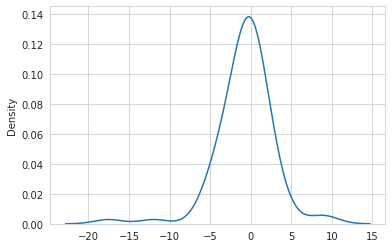

In [ ]:
# Menampilkan selisih data Y_test dan Y_pred dalam variable delta
delta = Y_test - Y_pred
#menampilkan hasil selisih tersebut menggunakan grafik
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

##**Eksperimen**

Pengubahan test size dari 20% ke 99%
(Dan 40%)

In [ ]:
#mendrop data yang tidak digunakan
X = df.drop(['mpg','car_name',"origin","acceleration","horsepower"],axis='columns')
Y = df['mpg']
#melakukan split menggunakan test_size 40%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40)
#menampilkan jumlah data train dan tes
print("jumlah data train :",len(X_train))
print("jumlah data tes :",len(X_test)) 

jumlah data train : 238
jumlah data tes : 160


###**Scaling (Eksperimen)**

In [ ]:
#oScaling menggunakan StandardScaler untuk menghilangkan variansi data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

###**Pemodelan Data (Eksperimen)**

In [ ]:
#membuat model bagging regresor
br = BaggingRegressor()
#Memfit model ke data
br.fit(X_train_scaled,Y_train)
#Melakukan prediksi pada data test
Y_pred = br.predict(X_test_scaled)

###**Evaluasi (Eksperimen)**

In [ ]:
#Menampilkan R2 Score train, score test, dan score test yang menggunakan metrik sklearn, serta MSE dan RMSE 
#Saat tize size = 40%
print("skor train R2 :",br.score(X_train_scaled,Y_train))
print("skor Test R2 :",br.score(X_test_scaled,Y_test))
print("skor Test R2 (sklearn metrics) :",r2_score(Y_test,Y_pred))
print("MSE :",mean_squared_error(Y_test,Y_pred))
print("RMSE :",mean_squared_error(Y_test,Y_pred,squared=False))

skor train R2 : 0.9754691007272115
skor Test R2 : 0.8067985117411965
skor Test R2 (sklearn metrics) : 0.8067985117411965
MSE : 11.520215625000002
RMSE : 3.3941443141092282


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


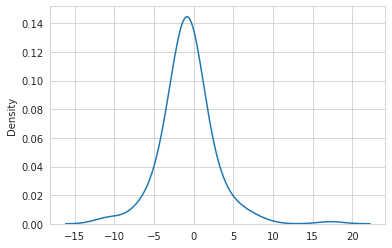

In [ ]:
#mengitung selisih Y_test dan Y_Pred
#Saat test size = 40%
delta = Y_test - Y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()